# Programming Questions

**Problem 1**

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?
b) Estimate the mean and the variance of the sum.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.preprocessing import StandardScaler
path='PatientData.csv'

Mean: -0.169916127703
Variance: 7.3722934526


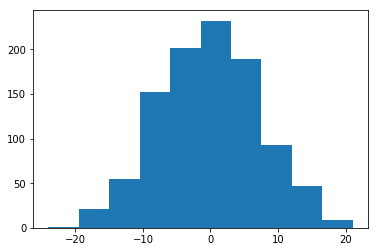

In [3]:
set1 = np.random.normal(-10, 5, 1000)
set2 = np.random.normal(10, 5, 1000)

setSum = np.add(set1, set2)

mean = np.mean(setSum)
variance = np.std(setSum)

print('Mean: ' + str(mean))
print('Variance: ' + str(variance))
plt.hist(setSum)
plt.show()

**Problem 2**

Let $X_{i}$ be an iid Bernoulli random variable with value {-1,1}. Look at the random variable $Z_{n}=\frac{1}{n}∑X_{i}$. By taking 1000 draws from $Z_{n}$, plot its histogram. Check that for small n (say, 5-10) $Z_{n}$ does not look that much like a Gaussian, but when n is bigger (already by the time n= 30 or 50) it looks much more like a Gaussian.  Check also for much bigger n: n= 250, to see that at this point, one can really see the bell curve.

In [ ]:
def plot_zn(n):
    draws = 1000
    zn_samples = []

    for i in range(draws):
        sample = 0

        # Create a draw of size n
        for j in range(n):
            # Result of a single trial of the i.i.d. Xi.
            value = np.random.binomial(1, 0.5)

            # Mapping trial failure to -1 to match distribution of Xi.
            sample += -1 if value == 0 else 1

        sample /= float(n)
        zn_samples.append(sample)

    # Set bins to large number to effectively show differences from varying sample sizes
    plt.hist(zn_samples, bins=500, histtype='bar', ec='black')
    plt.show()

plot_zn(10)
plot_zn(50)
plot_zn(250)

**Problem 3**

Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [ ]:
set1 = np.random.normal(0, 5, 25000)
plt.hist(set1)
plt.show()

npset = np.array(set1)

avg = np.sum(npset)/25000

print("Mean: " + str(avg))
print(npset)
npset -= avg
print(npset)
npset = npset**2
print(npset)
avg2 = np.sum(npset)/25000
print(avg2)
std = math.sqrt(avg2)

print("Standard Deviation: " + str(std))

**Problem 4**

Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution

$\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}20 & 0.8\\0.8 & 30\end{array}\right)\biggr)$.

Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [ ]:
num_samples = 10000
mean = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]

x, y = np.random.multivariate_normal(mean, cov, num_samples).T

mean_x = np.sum(x) / float(num_samples)
mean_y = np.sum(y) / float(num_samples)

mean = [mean_x, mean_y]

# cov = ∑((xi - mean_x)(yi - mean_y)) / (num_samples - 1)
numerator = np.sum((x - mean_x)*(y - mean_y))
denominator = num_samples - 1

cov = numerator / denominator

var_x = np.sum(((x - mean_x) ** 2)) / (num_samples - 1)
var_y = np.sum(((y - mean_y) ** 2)) / (num_samples - 1)

# cov_matrix_2d = [[var_x, cov], [cov, var_y]]
cov_matrix_2d = np.array([[var_x, cov], [cov, var_y]])

print "Mean: " + str(mean)
print "Covariance Matrix: " + "\n" + str(cov_matrix_2d)

**Problem 5** 

Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:
(a) How many patients and how many features are there?
(b) What is the meaning of the first 4 features? See if you can understand what they mean.
(c) Are there missing values? Replace them with the average of the corresponding feature column
(d) How could you test which features strongly influence the patient condition and which do not?

List what you think are the three most important features.

Reference: http://nbviewer.jupyter.org/url/users.ece.utexas.edu/~dimakis/DataScience/DataExploring3.ipynb

In [30]:
df=pd.read_csv(path,header=None,na_values='?')
df.head()
#head() only gives the first 5 rows of the dataframe

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
df.shape
#Rows = number of patients
#Columns = number of features + condition of patient

In [ ]:
#Plotting the first column as a time series
plt.plot(df[0])

In [ ]:
#Checking the top 10 highest values
df[0].value_counts()[:10]

In [ ]:
# Always integers, and 46 is the most frequent value, appearing in 15 patients.

#Making a histogram
df[0].hist(bins=10)

In [ ]:
# Observing that the range is from 0-80 and the median is around 45

In [ ]:
df[1].value_counts()

In [ ]:
plt.plot(df[2])

In [ ]:
df[ df[2]>200]  #select and show the rows where df[2] is big, AKA outliers

In [ ]:
df[2].value_counts()[:10]
#value_counts allows us to find the mode of values

In [ ]:
df2=df[[0,1,2,3]]

print df2.head()
print df2.shape
df3=df2.groupby(1).mean()
# groupby is used to average rows grouped by the values of one feature
df3

In [ ]:
# calculating the avg height and weight of patients 20yrs old +
df4= df2[ df[0]>19].groupby(1).mean()
df4

In [ ]:
# There are 452 patients, 279 features
# df[0] is the age of the patient
# df[1] appears to be the gender of the patient (M/F)
# df[2] is height in centimeters
# df[3] appears to be weight in kilograms
# 

In [32]:
# Does the dataframe contain missing values?
# SIDE NOTE: for some reason, pd.isna does not work, but not sure why???
pd.isnull(df).any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11      True
12      True
13      True
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
Length: 280, dtype: bool

In [33]:
# Replacing missing values with the average of the corresponding feat. col.
df.fillna(df.mean, inplace=True)
#Patients 10-14 have missing values

In [34]:
pd.isnull(df).any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
Length: 280, dtype: bool

How could you test which features strongly infuence the patient condition and which do not?
* One method of testing which features strongly influence the patient condition would be to see the correlation between each feature and the last column of the dataframe.

List what you think are the 3 most important features.
* The 3 most important features are 34, 138, and 7

In [45]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
cor_mat = df.corr()

threshold = 0.7
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs.sort_values(["correlation"], ascending=[False])

,attribute pair,correlation
34,"(150, 273)",0.997769
138,"(115, 243)",0.966664
7,"(66, 203)",0.941517
153,"(138, 263)",0.933495
170,"(54, 193)",0.932293
97,"(181, 211)",0.922657
16,"(187, 217)",0.917264
143,"(171, 211)",0.913032
161,"(18, 163)",0.909704
3,"(265, 275)",0.898566


# Written Questions